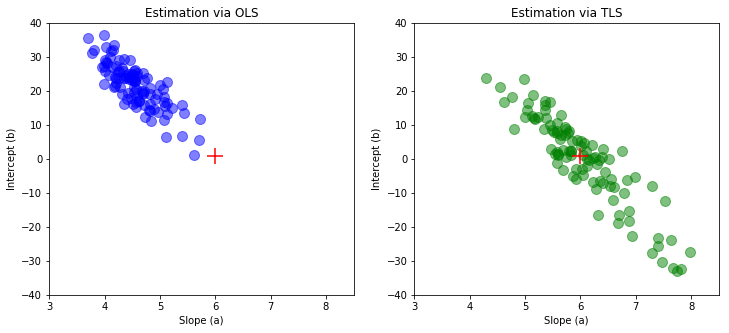

In [13]:
##### Problem 1.1 ####
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import scipy.odr as odr
from scipy.stats import linregress

# set seed
np.random.seed(1212)

results_a1 = []
results_b1 = []
results_a2 = []
results_b2 = []

for i in range(1,101):
    n = 30
    x = np.array(range(30)).reshape(-1,1)
    y = 6*x + 1
    v = np.concatenate((x, y), axis = 1)
    
    # generate noise
    mu = (0, 0)
    cov = [[25,0],[0,25]]
    err = np.random.multivariate_normal(mu, cov, n)
    v_final = np.round(v + err)

    # estimation method 1: vertical error (OLS)
    x_bar = np.mean(v_final[...,0])
    y_bar = np.mean(v_final[...,1])
    sq_diff_x = (v_final[...,0] - x_bar)**2
    ssd_x = np.sum(sq_diff_x)
    a1 = (np.sum((v_final[...,0] - x_bar)*(v_final[...,1] - y_bar)))/ssd_x
    b1 = y_bar - a1*x_bar
    
    # estimation method 2: orthogonal error (TLS)
    sq_diff_y = (v_final[...,1] - y_bar)**2
    ssd_y = np.sum(sq_diff_y)
    w = ssd_y - ssd_x
    r = 2*np.sum((v_final[...,0] - x_bar)*(v_final[...,1] - y_bar))
    a2 = (w + (w**2 + r**2)**(1/2))/r
    b2 = y_bar - a2*x_bar
    
    # save results 
    results_a1.append(a1)
    results_b1.append(b1)
    results_a2.append(a2)
    results_b2.append(b2)

# all a and b values from the 100 simulations for each estimation method
a1_all = np.hstack(results_a1)
b1_all = np.hstack(results_b1)
a2_all = np.hstack(results_a2)
b2_all = np.hstack(results_b2)

# scatterplots of a and b values for each estimation method
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,5))
ax1.scatter(a1_all, b1_all, color = 'b', alpha = 0.5, s=100)
ax1.scatter(6, 1, s=250, marker='+', color='r')
ax1.set_xlim([3,8.5])
ax1.set_ylim([-40,40])
ax1.set_xlabel('Slope (a)')
ax1.set_ylabel('Intercept (b)')
ax1.set_title('Estimation via OLS')
ax2.scatter(a2_all, b2_all, color = 'g', alpha = 0.5, s=100)
ax2.scatter(6, 1, s=250, marker='+', color='r')
ax2.set_xlim([3,8.5])
ax2.set_ylim([-40,40])
ax2.set_xlabel('Slope (a)')
ax2.set_ylabel('Intercept (b)')
ax2.set_title('Estimation via TLS')
plt.show()

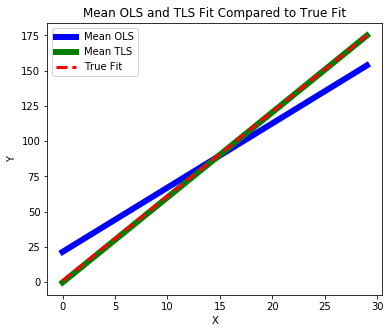

In [2]:
# linear plots of mean and and b values for each estimation method 
mean_a1 = np.mean(a1_all)
mean_b1 = np.mean(b1_all)
mean_a2 = np.mean(a2_all)
mean_b2 = np.mean(b2_all)

ols_y = mean_a1*x + mean_b1
tls_y = mean_a2*x + mean_b2
true_y = 6*x + 1

plt.figure(figsize = (6,5))
plt.plot(x, ols_y, color='b', linewidth = 6, label='Mean OLS')
plt.plot(x, tls_y, color='g', linewidth = 6, label='Mean TLS')
plt.plot(x, true_y, color='r', linestyle = '--', linewidth = 3, label='True Fit')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Mean OLS and TLS Fit Compared to True Fit')
plt.show()

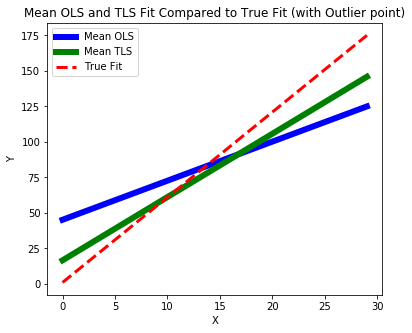

In [3]:
##### Problem 1.2 #####
# set seed
np.random.seed(1212)

results_a1 = []
results_b1 = []
results_a2 = []
results_b2 = []

for i in range(1,101):
    n = 30
    x = np.array(range(30)).reshape(-1,1)
    y = 6*x + 1
    v = np.concatenate((x, y), axis = 1)
    
    # generate noise
    mu = (0, 0)
    cov = [[25,0],[0,25]]
    err = np.random.multivariate_normal(mu, cov, n)
    v_final = np.round(v + err)
    
    # generate single data point with noise from different MVN distribution
    x_31 = np.array(31).reshape(-1,1)
    y_31 = 6*x_31 + 1
    v_31 = np.concatenate((x_31, y_31), axis = 1)
    mu_31 = (50, 2)
    err_31 = np.random.multivariate_normal(mu_31, cov, 1)
    v_final_31 = np.round(v_31 + err_31)
    
    # add to existing v_final and err vectors
    v_final_new = np.vstack([v_final, v_final_31])
    
    # estimation method 1: vertical error (OLS)
    x_bar = np.mean(v_final_new[...,0])
    y_bar = np.mean(v_final_new[...,1])
    sq_diff_x = (v_final_new[...,0] - x_bar)**2
    ssd_x = np.sum(sq_diff_x)
    a1 = (np.sum((v_final_new[...,0] - x_bar)*(v_final_new[...,1] - y_bar)))/ssd_x
    b1 = y_bar - a1*x_bar
    
    # estimation method 2: orthogonal error (TLS)
    sq_diff_y = (v_final_new[...,1] - y_bar)**2
    ssd_y = np.sum(sq_diff_y)
    w = ssd_y - ssd_x
    r = 2*np.sum((v_final_new[...,0] - x_bar)*(v_final_new[...,1] - y_bar))
    a2 = (w + (w**2 + r**2)**(1/2))/r
    b2 = y_bar - a2*x_bar
    
    # save results 
    results_a1.append(a1)
    results_b1.append(b1)
    results_a2.append(a2)
    results_b2.append(b2)

# all a and b values from the 100 simulations for each estimation method
a1_all = np.hstack(results_a1)
b1_all = np.hstack(results_b1)
a2_all = np.hstack(results_a2)
b2_all = np.hstack(results_b2)

# linear plots of mean and and b values for each estimation method 
# (with outlier 31st data point) 
mean_a1 = np.mean(a1_all)
mean_b1 = np.mean(b1_all)
mean_a2 = np.mean(a2_all)
mean_b2 = np.mean(b2_all)

ols_y = mean_a1*x + mean_b1
tls_y = mean_a2*x + mean_b2
true_y = 6*x + 1

plt.figure(figsize = (6,5))
plt.plot(x, ols_y, color='b', linewidth = 6, label='Mean OLS')
plt.plot(x, tls_y, color='g', linewidth = 6, label='Mean TLS')
plt.plot(x, true_y, color='r', linestyle = '--', linewidth = 3, label='True Fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Mean OLS and TLS Fit Compared to True Fit (with Outlier point)')
plt.show()

In [4]:
##### Problem 2.1 ####
import cv2

# read image
img = cv2.imread('/Users/piper/Piper Documents/Biomedical Imaging/Assignments/Assignment 1/DataRaw/P2_image.png',0)

# Gaussian filtering (kernel size equals 6*sigma + 1)
img_gaus1 = cv2.GaussianBlur(img, (7,7), 1)
img_gaus3 = cv2.GaussianBlur(img, (19,19), 3)
img_gaus5 = cv2.GaussianBlur(img, (31,31), 5)
img_gaus7 = cv2.GaussianBlur(img, (43,43), 7)
img_gaus9 = cv2.GaussianBlur(img, (55,55), 9)

compare_filt1 = np.hstack((img, img_gaus1, img_gaus3))
compare_filt2 = np.hstack((img_gaus5, img_gaus7, img_gaus9))
compare_filt_gaus = np.vstack((compare_filt1, compare_filt2))
cv2.imwrite('compare_filt_gaus.png', compare_filt_gaus)

# median filtering
img_med3 = cv2.medianBlur(img, 3)
img_med5 = cv2.medianBlur(img, 5)
img_med7 = cv2.medianBlur(img, 7)
img_med9 = cv2.medianBlur(img, 9)
img_med11 = cv2.medianBlur(img, 11)

compare_filt1 = np.hstack((img, img_med3, img_med5))
compare_filt2 = np.hstack((img_med7, img_med9, img_med11))
compare_filt_med = np.vstack((compare_filt1, compare_filt2))
# cv2.imwrite('compare_filt_med.png', compare_filt_med)

In [5]:
##### Problem 2.2 #####
# Gaussian filtering (kernel size equals 12*sigma + 1)
img2_gaus1 = cv2.GaussianBlur(img, (13,13), 1)
img2_gaus3 = cv2.GaussianBlur(img, (37,37), 3)
img2_gaus5 = cv2.GaussianBlur(img, (61,61), 5)
img2_gaus7 = cv2.GaussianBlur(img, (85,85), 7)
img2_gaus9 = cv2.GaussianBlur(img, (109,109), 9)

compare_filt1 = np.hstack((img, img2_gaus1, img2_gaus3))
compare_filt2 = np.hstack((img2_gaus5, img2_gaus7, img2_gaus9))
compare_filt_gaus = np.vstack((compare_filt1, compare_filt2))
# cv2.imwrite('compare_filt_gaus_2.png', compare_filt_gaus) 

In [6]:
# compare images using absolute difference in maximum intesity value
import pandas as pd

diff1 = np.abs(np.max(img_gaus1) - np.max(img2_gaus1))
diff3 = np.abs(np.max(img_gaus3) - np.max(img2_gaus3))
diff5 = np.abs(np.max(img_gaus5) - np.max(img2_gaus5))
diff7 = np.abs(np.max(img_gaus7) - np.max(img2_gaus7))
diff9 = np.abs(np.max(img_gaus9) - np.max(img2_gaus9))

table = pd.DataFrame({'$\sigma$': ['1', '3', '5', '7', '9'],
                     '|Difference|': [diff1, diff3, diff5, diff7, diff9]})
table.set_index('$\sigma$', inplace = True)

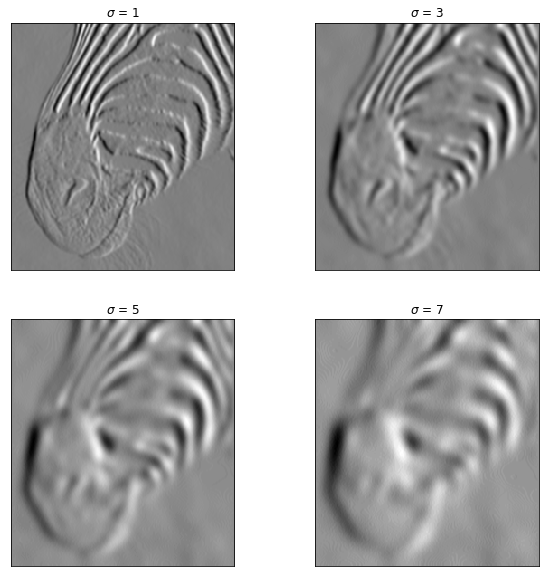

In [7]:
##### Problem 3.1 #####
img = cv2.imread('/Users/piper/Piper Documents/Biomedical Imaging/Assignments/Assignment 1/DataRaw/P3_image.png',0)

# smooth images via Gaussian filtering
img_gaus1 = cv2.GaussianBlur(img, (7,7), 1)
img_gaus3 = cv2.GaussianBlur(img, (19,19), 3)
img_gaus5 = cv2.GaussianBlur(img, (31,31), 5)
img_gaus7 = cv2.GaussianBlur(img, (43,43), 7)

# derivative of Gaussian Filter (Sobel)
img_sobel1x = cv2.Sobel(img_gaus1, cv2.CV_64F, 1, 0, ksize=3)
img_sobel1y = cv2.Sobel(img_gaus1, cv2.CV_64F, 0, 1, ksize=3)
img_sobel3x = cv2.Sobel(img_gaus3, cv2.CV_64F, 1, 0, ksize=3)
img_sobel3y = cv2.Sobel(img_gaus3, cv2.CV_64F, 0, 1, ksize=3)
img_sobel5x = cv2.Sobel(img_gaus5, cv2.CV_64F, 1, 0, ksize=3)
img_sobel5y = cv2.Sobel(img_gaus5, cv2.CV_64F, 0, 1, ksize=3)
img_sobel7x = cv2.Sobel(img_gaus7, cv2.CV_64F, 1, 0, ksize=3)
img_sobel7y = cv2.Sobel(img_gaus7, cv2.CV_64F, 0, 1, ksize=3)

# calculate gradient magnitude for each image
grad_mag1 = ((img_sobel1x)**2 + (img_sobel1y)**2)**(1/2)
grad_mag3 = ((img_sobel3x)**2 + (img_sobel3y)**2)**(1/2)
grad_mag5 = ((img_sobel5x)**2 + (img_sobel5y)**2)**(1/2)
grad_mag7 = ((img_sobel7x)**2 + (img_sobel7y)**2)**(1/2)

# generate thresholds (= 20% of max gradient magnitude)
thresh1 = (np.max(grad_mag1))*0.2
thresh3 = (np.max(grad_mag3))*0.2 
thresh5 = (np.max(grad_mag5))*0.2 
thresh7 = (np.max(grad_mag7))*0.2

# threshold the gradient magnitude images to get binary image 
retval, img_thresh1 = cv2.threshold(grad_mag1, thresh1, 255, cv2.THRESH_BINARY)
retval, img_thresh3 = cv2.threshold(grad_mag3, thresh3, 255, cv2.THRESH_BINARY)
retval, img_thresh5 = cv2.threshold(grad_mag5, thresh5, 255, cv2.THRESH_BINARY)
retval, img_thresh7 = cv2.threshold(grad_mag7, thresh7, 255, cv2.THRESH_BINARY)

# plot x-derivative images for all sigmas
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (10,10))
ax1.imshow(img_sobel1x, cmap = 'gray')
ax1.set_xticks([]), ax1.set_yticks([])
ax1.set_title('$\sigma$ = 1')
ax2.imshow(img_sobel3x, cmap = 'gray')
ax2.set_xticks([]), ax2.set_yticks([])
ax2.set_title('$\sigma$ = 3')
ax3.imshow(img_sobel5x, cmap = 'gray')
ax3.set_xticks([]), ax3.set_yticks([])
ax3.set_title('$\sigma$ = 5')
ax4.imshow(img_sobel7x, cmap = 'gray')
ax4.set_xticks([]), ax4.set_yticks([])
ax4.set_title('$\sigma$ = 7')
plt.show()

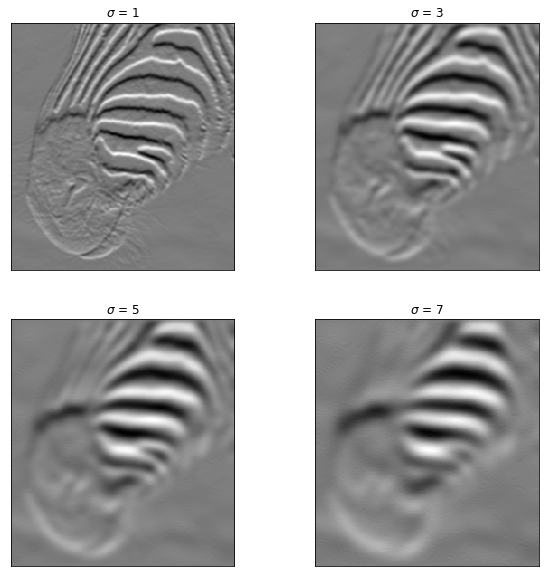

In [8]:
# plot y-derivative images for all sigmas
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (10,10))
ax1.imshow(img_sobel1y, cmap = 'gray')
ax1.set_xticks([]), ax1.set_yticks([])
ax1.set_title('$\sigma$ = 1')
ax2.imshow(img_sobel3y, cmap = 'gray')
ax2.set_xticks([]), ax2.set_yticks([])
ax2.set_title('$\sigma$ = 3')
ax3.imshow(img_sobel5y, cmap = 'gray')
ax3.set_xticks([]), ax3.set_yticks([])
ax3.set_title('$\sigma$ = 5')
ax4.imshow(img_sobel7y, cmap = 'gray')
ax4.set_xticks([]), ax4.set_yticks([])
ax4.set_title('$\sigma$ = 7')
plt.show()

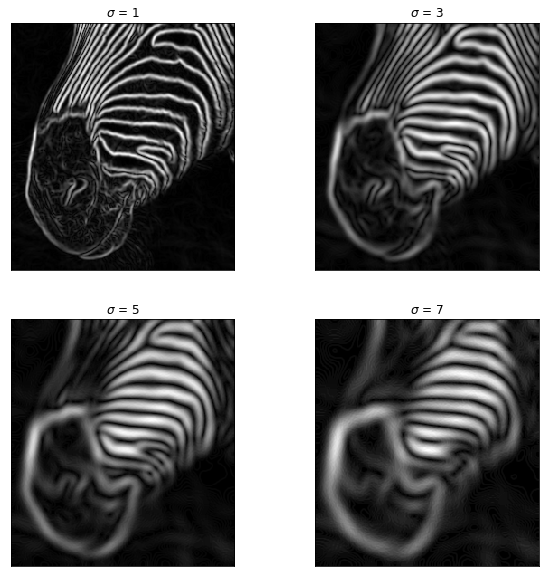

In [9]:
# plot gradient magnitude images for all sigmas
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (10,10))
ax1.imshow(grad_mag1, cmap = 'gray')
ax1.set_xticks([]), ax1.set_yticks([])
ax1.set_title('$\sigma$ = 1')
ax2.imshow(grad_mag3, cmap = 'gray')
ax2.set_xticks([]), ax2.set_yticks([])
ax2.set_title('$\sigma$ = 3')
ax3.imshow(grad_mag5, cmap = 'gray')
ax3.set_xticks([]), ax3.set_yticks([])
ax3.set_title('$\sigma$ = 5')
ax4.imshow(grad_mag7, cmap = 'gray')
ax4.set_xticks([]), ax4.set_yticks([])
ax4.set_title('$\sigma$ = 7')
plt.show()

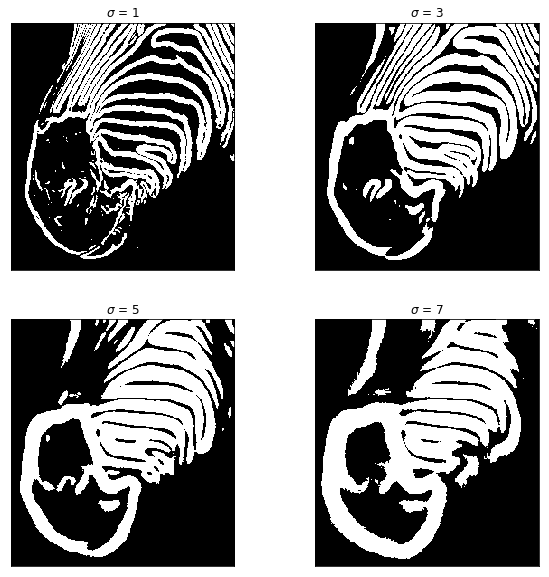

In [10]:
# plot binary images for all sigmas
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (10,10))
ax1.imshow(img_thresh1, cmap = 'gray')
ax1.set_xticks([]), ax1.set_yticks([])
ax1.set_title('$\sigma$ = 1')
ax2.imshow(img_thresh3, cmap = 'gray')
ax2.set_xticks([]), ax2.set_yticks([])
ax2.set_title('$\sigma$ = 3')
ax3.imshow(img_thresh5, cmap = 'gray')
ax3.set_xticks([]), ax3.set_yticks([])
ax3.set_title('$\sigma$ = 5')
ax4.imshow(img_thresh7, cmap = 'gray')
ax4.set_xticks([]), ax4.set_yticks([])
ax4.set_title('$\sigma$ = 7')
plt.show()

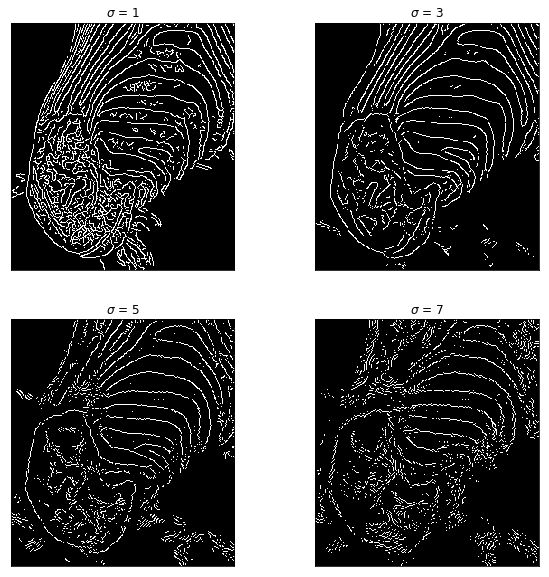

In [11]:
##### Problem 3.2 #####
# find thresholds (high and low)
thresh1_high = (np.max(grad_mag1))*0.1
thresh3_high = (np.max(grad_mag3))*0.1
thresh5_high = (np.max(grad_mag5))*0.1
thresh7_high = (np.max(grad_mag7))*0.1

thresh1_low = (np.max(grad_mag1))*0.04
thresh3_low = (np.max(grad_mag3))*0.04
thresh5_low = (np.max(grad_mag5))*0.04
thresh7_low = (np.max(grad_mag7))*0.04

# Canny edge detection
img_canny1 = cv2.Canny(img_gaus1, thresh1_low, thresh1_high)
img_canny3 = cv2.Canny(img_gaus3, thresh3_low, thresh3_high)
img_canny5 = cv2.Canny(img_gaus5, thresh5_low, thresh5_high)
img_canny7 = cv2.Canny(img_gaus7, thresh7_low, thresh7_high)

# plot canny edge detection images for all sigmas
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (10,10))
ax1.imshow(img_canny1, cmap = 'gray')
ax1.set_xticks([]), ax1.set_yticks([])
ax1.set_title('$\sigma$ = 1')
ax2.imshow(img_canny3, cmap = 'gray')
ax2.set_xticks([]), ax2.set_yticks([])
ax2.set_title('$\sigma$ = 3')
ax3.imshow(img_canny5, cmap = 'gray')
ax3.set_xticks([]), ax3.set_yticks([])
ax3.set_title('$\sigma$ = 5')
ax4.imshow(img_canny7, cmap = 'gray')
ax4.set_xticks([]), ax4.set_yticks([])
ax4.set_title('$\sigma$ = 7')
plt.show()

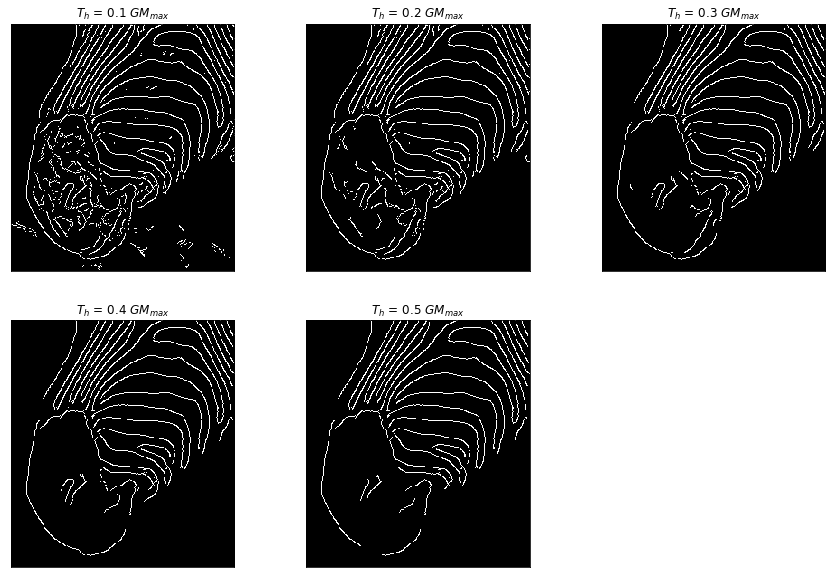

In [12]:
# constant sigma (=3), varying thresholds
# find thresholds (high and low)
thresh10_high = (np.max(grad_mag3))*0.1
thresh20_high = (np.max(grad_mag3))*0.2
thresh30_high = (np.max(grad_mag3))*0.3
thresh40_high = (np.max(grad_mag3))*0.4
thresh50_high = (np.max(grad_mag3))*0.5

thresh10_low = thresh10_high*0.4
thresh20_low = thresh20_high*0.4
thresh30_low = thresh30_high*0.4
thresh40_low = thresh40_high*0.4
thresh50_low = thresh50_high*0.4

# Canny edge detection
img_canny10 = cv2.Canny(img_gaus3, thresh10_low, thresh10_high)
img_canny20 = cv2.Canny(img_gaus3, thresh20_low, thresh20_high)
img_canny30 = cv2.Canny(img_gaus3, thresh30_low, thresh30_high)
img_canny40 = cv2.Canny(img_gaus3, thresh40_low, thresh40_high)
img_canny50 = cv2.Canny(img_gaus3, thresh50_low, thresh50_high)

# plot canny edge detection images for all thresholds
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize = (15,10))
ax1.imshow(img_canny10, cmap = 'gray')
ax1.set_xticks([]), ax1.set_yticks([])
ax1.set_title('$T_h$ = 0.1 $GM_{max}$')
ax2.imshow(img_canny20, cmap = 'gray')
ax2.set_xticks([]), ax2.set_yticks([])
ax2.set_title('$T_h$ = 0.2 $GM_{max}$')
ax3.imshow(img_canny30, cmap = 'gray')
ax3.set_xticks([]), ax3.set_yticks([])
ax3.set_title('$T_h$ = 0.3 $GM_{max}$')
ax4.imshow(img_canny40, cmap = 'gray')
ax4.set_xticks([]), ax4.set_yticks([])
ax4.set_title('$T_h$ = 0.4 $GM_{max}$')
ax5.imshow(img_canny50, cmap = 'gray')
ax5.set_xticks([]), ax5.set_yticks([])
ax5.set_title('$T_h$ = 0.5 $GM_{max}$')
fig.delaxes(ax6)
plt.show()